In [1]:
# Cargando librerias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Cargando la base de datos y preparando los datos

Medic = pd.read_csv('drugs.csv')
feature_cols = ['Age','Sex','BP','Cholesterol','Na_to_K']
X = Medic[feature_cols].values
y = Medic['Drug']

# Preprocesando de los datos

Pre_sex = preprocessing.LabelEncoder()
Pre_sex.fit(['F','M'])
X[:,1] = Pre_sex.transform(X[:,1])

Pre_BP = preprocessing.LabelEncoder()
Pre_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = Pre_BP.transform(X[:,2])

Pre_Chol = preprocessing.LabelEncoder()
Pre_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = Pre_Chol.transform(X[:,3])

In [3]:
# Dividiendo los datos en entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

## Regresión Logistica con Solver (sag)

In [4]:
# Entrenando el modelo de regresion logistica

model = LogisticRegression(solver='sag')
clf = model.fit(X_train,y_train)

# Prediciendo los valores de la base de prueba y evaluando el modelo

print('Solver: sag')
y_pred = model.predict(X_test)
print("Intercept:", clf.intercept_)
print("Coeficientes:", clf.coef_)
score = model.score(X_test, y_test)
print('----------------------------------------------')
print(f"Score: {score:.3f}")
print('----------------------------------------------')

# Reporte de clasificacion
print('Reporte de clasificacion')
print(classification_report(y_test, y_pred))


Solver: sag
Intercept: [ 0.20135587 -0.06384131  0.11243866  0.23446518 -0.48441841]
Coeficientes: [[-0.02080272  0.05051055 -0.58211018  0.06412518  0.08355418]
 [ 0.07367651 -0.03337174 -0.57374091 -0.01446503 -0.31045123]
 [-0.00947944  0.00902356  0.14922589 -0.32007975  0.01997255]
 [ 0.00702338  0.08065681  1.30286496  0.43349476 -0.0983278 ]
 [-0.05041773 -0.10681919 -0.29623975 -0.16307516  0.30525231]]
----------------------------------------------
Score: 0.700
----------------------------------------------
Reporte de clasificacion
              precision    recall  f1-score   support

       drugA       1.00      0.12      0.22         8
       drugB       0.33      0.25      0.29         4
       drugC       0.00      0.00      0.00         3
       drugX       0.67      0.83      0.74        12
       drugY       0.73      0.91      0.81        33

    accuracy                           0.70        60
   macro avg       0.55      0.42      0.41        60
weighted avg       

## Regresion logistica solver (newton-cg)

In [5]:
model = LogisticRegression(solver='newton-cg')
clf = model.fit(X_train,y_train)

# Prediciendo los valores de la base de prueba y evaluando el modelo

print('Solver: newton-cg')
y_pred = model.predict(X_test)
print("Intercept:", clf.intercept_)
print("Coeficientes:", clf.coef_)
score = model.score(X_test, y_test)
print('----------------------------------------------')
print(f"Score: {score:.3f}")
print('----------------------------------------------')

# Reporte de clasificacion
print('Reporte de clasificacion')
print(classification_report(y_test, y_pred))

Solver: newton-cg
Intercept: [ 13.35126554   1.43358367   9.55857434   4.82513882 -29.16856237]
Coeficientes: [[-8.23226275e-02 -2.21995689e-02 -2.15690081e+00 -3.95403677e-01
  -6.07842083e-01]
 [ 1.13621911e-01 -2.00036047e-01 -1.74277709e+00  8.93596966e-02
  -4.49711452e-01]
 [-2.97960766e-02 -2.08427817e-02  6.08625547e-01 -1.57707814e+00
  -5.42759872e-01]
 [-9.05639410e-04 -3.12538147e-02  3.06776774e+00  1.53442567e+00
  -4.98086464e-01]
 [-5.97567624e-04  2.74332212e-01  2.23284615e-01  3.48696450e-01
   2.09839987e+00]]
----------------------------------------------
Score: 0.983
----------------------------------------------
Reporte de clasificacion
              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         8
       drugB       0.80      1.00      0.89         4
       drugC       1.00      0.67      0.80         3
       drugX       1.00      1.00      1.00        12
       drugY       1.00      1.00      1.00        33

    ac

In [10]:
y_pred_proba = model.predict_proba(X_test)[::,1]
y_pred_proba[0:5]

array([2.46164539e-03, 3.96262583e-04, 4.99939382e-04, 5.35858412e-03,
       6.00935711e-01])

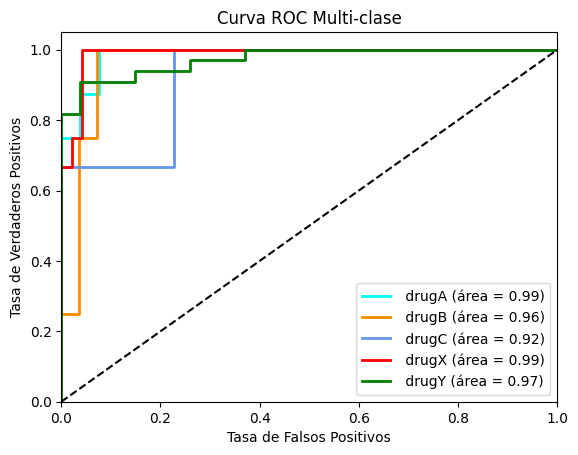

In [21]:
# Modelando la curva ROC

from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from itertools import cycle

# Binarizacion para cada clase
classes = ['drugA', 'drugB', 'drugC', 'drugX', 'drugY']
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

# Tu modelo predictivo
y_score = model.predict_proba(X_test)

# Calculo y clasificacion de la curva para cada clase
# se crean los vectores fpr, tpr y roc_auc como diccionarios
fpr = dict()
tpr = dict()
roc_auc = dict()

# se itera sobre cada clase para calcular la curva
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# se da formato a la grafica
# y se realiza un ciclo para graficar cada clase

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=' {0} (área = {1:0.2f})'
             ''.format(classes[i], roc_auc[i]))

# se grafica la curva ROC para cada clase

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC Multi-clase')
plt.legend(loc="lower right")
plt.show()


## Regresion logistica solver (liblinear)

In [6]:
model = LogisticRegression(solver='liblinear')
clf = model.fit(X_train,y_train)

# Prediciendo los valores de la base de prueba y evaluando el modelo

print('Solver: liblinear')
y_pred = model.predict(X_test)
print("Intercept:", clf.intercept_)
print("Coeficientes:", clf.coef_)
score = model.score(X_test, y_test)
print('----------------------------------------------')
print(f"Score: {score:.3f}")
print('----------------------------------------------')

# Reporte de clasificacion
print('Reporte de clasificacion')
print(classification_report(y_test, y_pred))

Solver: liblinear
Intercept: [ 1.98611174 -0.58928316  0.79908234  0.15358171 -4.02603849]
Coeficientes: [[-2.15619178e-02  8.38977393e-02 -2.14014092e+00 -1.13011510e-01
  -1.64309675e-01]
 [ 1.02750711e-01 -3.75132900e-01 -2.46262928e+00 -1.86018275e-01
  -4.43413944e-01]
 [-1.16026470e-02 -3.39795202e-02  1.36549295e-03 -1.86218693e+00
  -1.50409241e-01]
 [ 1.18465291e-02 -1.72540082e-01  3.06488127e+00  1.99217088e+00
  -4.46330803e-01]
 [-3.86389133e-02 -8.75973129e-02 -6.29563130e-01 -4.17421002e-01
   4.25284321e-01]]
----------------------------------------------
Score: 0.783
----------------------------------------------
Reporte de clasificacion
              precision    recall  f1-score   support

       drugA       1.00      0.38      0.55         8
       drugB       0.50      0.50      0.50         4
       drugC       0.00      0.00      0.00         3
       drugX       0.75      1.00      0.86        12
       drugY       0.81      0.91      0.86        33

    accurac

## Regresion logistica solver (saga)

In [7]:
model = LogisticRegression(solver='saga')
clf = model.fit(X_train,y_train)

# Prediciendo los valores de la base de prueba y evaluando el modelo

print('Solver: saga')
y_pred = model.predict(X_test)
print("Intercept:", clf.intercept_)
print("Coeficientes:", clf.coef_)
score = model.score(X_test, y_test)
print('----------------------------------------------')
print(f"Score: {score:.3f}")
print('----------------------------------------------')

# Reporte de clasificacion
print('Reporte de clasificacion')
print(classification_report(y_test, y_pred))

Solver: saga
Intercept: [ 0.10085848 -0.0428946   0.05522788  0.14801567 -0.26120743]
Coeficientes: [[-0.01928551  0.02892019 -0.34236178  0.03747898  0.06974867]
 [ 0.06868283 -0.01639886 -0.35664306 -0.01285575 -0.30486264]
 [-0.0084911   0.00400591  0.07081166 -0.1759041   0.01369364]
 [ 0.01007212  0.05276275  0.85809463  0.24862418 -0.05801756]
 [-0.05097833 -0.06928999 -0.22990145 -0.09734331  0.27943789]]
----------------------------------------------
Score: 0.683
----------------------------------------------
Reporte de clasificacion
              precision    recall  f1-score   support

       drugA       0.00      0.00      0.00         8
       drugB       0.33      0.25      0.29         4
       drugC       0.00      0.00      0.00         3
       drugX       0.62      0.83      0.71        12
       drugY       0.73      0.91      0.81        33

    accuracy                           0.68        60
   macro avg       0.34      0.40      0.36        60
weighted avg      

## Regresion logistica solver (lbfgs)

In [8]:
model = LogisticRegression(solver='lbfgs')
clf = model.fit(X_train,y_train)

# Prediciendo los valores de la base de prueba y evaluando el modelo

y_pred = model.predict(X_test)
print('Solver: lbfgs')
print("Intercept:", clf.intercept_)
print("Coeficientes:", clf.coef_)
score = model.score(X_test, y_test)
print('----------------------------------------------')
print(f"Score: {score:.3f}")
print('----------------------------------------------')

# Reporte de clasificacion
print('Reporte de clasificacion')
print(classification_report(y_test, y_pred))

Solver: lbfgs
Intercept: [ 1.44187536 -0.3175355   1.01250377  0.84713908 -2.9839827 ]
Coeficientes: [[-0.02082791  0.15120825 -2.48063437 -0.05200362  0.07093504]
 [ 0.10109292 -0.30875847 -2.31103454 -0.09854676 -0.30125485]
 [-0.02715937  0.14117973  1.12672251 -1.6631665   0.0312872 ]
 [-0.01175344  0.04665861  3.35306364  2.37196743 -0.27390755]
 [-0.0413522  -0.03028812  0.31188276 -0.55825055  0.47294015]]
----------------------------------------------
Score: 0.850
----------------------------------------------
Reporte de clasificacion
              precision    recall  f1-score   support

       drugA       0.71      0.62      0.67         8
       drugB       0.50      0.50      0.50         4
       drugC       1.00      0.67      0.80         3
       drugX       0.80      1.00      0.89        12
       drugY       0.94      0.91      0.92        33

    accuracy                           0.85        60
   macro avg       0.79      0.74      0.76        60
weighted avg     